<a href="https://colab.research.google.com/github/shivam-mangal/Chennai_sale_price_project/blob/main/Chennai_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [89]:
filename = "/content/train-chennai-sale.csv"
data_file = pd.read_csv(filename)
data_file.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [90]:
# copy the orginal data_file into variable data
data = data_file.copy(deep=True)

In [91]:
data.shape

(7109, 22)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

From the info function we can find the number of rows and columns present in our dataframe. We can also find the dtype of all columns.

There are few missing values in some columns

In [93]:
# checking the missing values in the dataframe
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

QS_overall has maximum missing values

From observe the data its seems that QS_OVERALL is an average of QS_ROOMS, QS_BATHROOM, QS_BEDROOM

In [94]:
data[["N_BATHROOM","N_BEDROOM","QS_OVERALL"]].describe()

,N_BATHROOM,N_BEDROOM,QS_OVERALL
count,7104.000000,7108.000000,7061.000000
mean,1.213260,1.637029,3.503254
std,0.409639,0.802902,0.527223
min,1.000000,1.000000,2.000000
25%,1.000000,1.000000,3.130000
50%,1.000000,1.000000,3.500000
75%,1.000000,2.000000,3.890000
max,2.000000,4.000000,4.970000


In [95]:
# Find the correlation between QS OVERALL and mean of other three feature
data["N_BATHROOM"]=data["N_BATHROOM"].fillna(data["N_BATHROOM"].mode()[0])

In [96]:
data["N_BEDROOM"]=data["N_BEDROOM"].fillna(data["N_BEDROOM"].mode()[0])

In [97]:
data["QS_OVERALL"]=data["QS_OVERALL"].fillna(data["QS_OVERALL"].mean())

In [98]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Now there is no null values present in the dataset

Checking the dtype of all columns we can find the dtype of DATE_SALE, DATE_BUILD is object type convert it to datetime type 

In [100]:
data["DATE_SALE"] = pd.to_datetime(data["DATE_SALE"], format = "%d-%m-%Y")
data["DATE_BUILD"] = pd.to_datetime(data["DATE_BUILD"], format = "%d-%m-%Y")
data["N_BATHROOM"] = data["N_BATHROOM"].astype(np.int32)
data["N_BEDROOM"] = data["N_BEDROOM"].astype(np.int32)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int32         
 6   N_BATHROOM     7109 non-null   int32         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

Checking a spelling mismatch in object columns

In [102]:
obj_cnames = data.select_dtypes(include='object').columns
for cname in obj_cnames:
    print(data[cname].unique())

['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [103]:

# Correcting the spelling mistakes in area columns
data.AREA = data.AREA.replace({'Velchery':'Velachery', 
                       'KKNagar':'KK Nagar', 
                       'TNagar':'T Nagar', 
                       'Chormpet':'Chrompet', 
                       'Chrompt':'Chrompet', 
                       'Chrmpet':'Chrompet', 
                       'Ana Nagar':'Anna Nagar', 
                       'Ann Nagar':'Anna Nagar',
                       'Karapakam':'Karapakkam', 
                       'Adyr':'Adyar'})

# Correcting the spelling mistakes in sale_cond columns
data.SALE_COND = data.SALE_COND.replace({'Adj Land':'AdjLand', 
                       'Normal Sale':'Normal Sale',
                       'PartiaLl':'Partial',
                       'Ab Normal':'AbNormal',
                       "Partiall":"Partial"})

# Correcting the spelling mistakes in park_facil columns
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':'No'})

# Correcting the spelling mistakes in buildtype columns
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':'Commercial', 
                       'Others':'Other'})

# Correcting the spelling mistakes in utility_avail columns
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':'AllPub',
                                             'NoSewr':'NoSeWa'})
                                            

# Correcting the spelling mistakes in street columns
data.STREET = data.STREET.replace({'Pavd':'Paved', 
                       'NoAccess':'No Access'})


In [104]:
# Creating property_age column which determine how old property is:
data["PROPERTY_AGE"] = pd.DatetimeIndex(data["DATE_SALE"]).year - pd.DatetimeIndex(data["DATE_BUILD"]).year


In [105]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PROPERTY_AGE
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


 Correlation between all numerical columns

In [106]:
# Let's find the correlation of data
correlation = data.corr()
correlation

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PROPERTY_AGE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,0.657544,0.571076,0.612125,-0.012610
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.011600,0.010994,0.018783,-0.003559
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,0.455380,0.430446,0.330987,-0.045873
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,0.260244,0.256726,0.108834,-0.020403
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,0.630932,0.533343,0.602760,-0.033316
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.019739,0.009377,0.021967,0.019718
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.006719,-0.000471,-0.011377,0.021700
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,0.021526,0.020118,0.018804,-0.017971
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.022410,0.016946,0.020485,0.012517
REG_FEE,0.657544,0.011600,0.455380,0.260244,0.630932,0.019739,-0.006719,0.021526,0.022410,1.000000,0.659903,0.878148,-0.116322


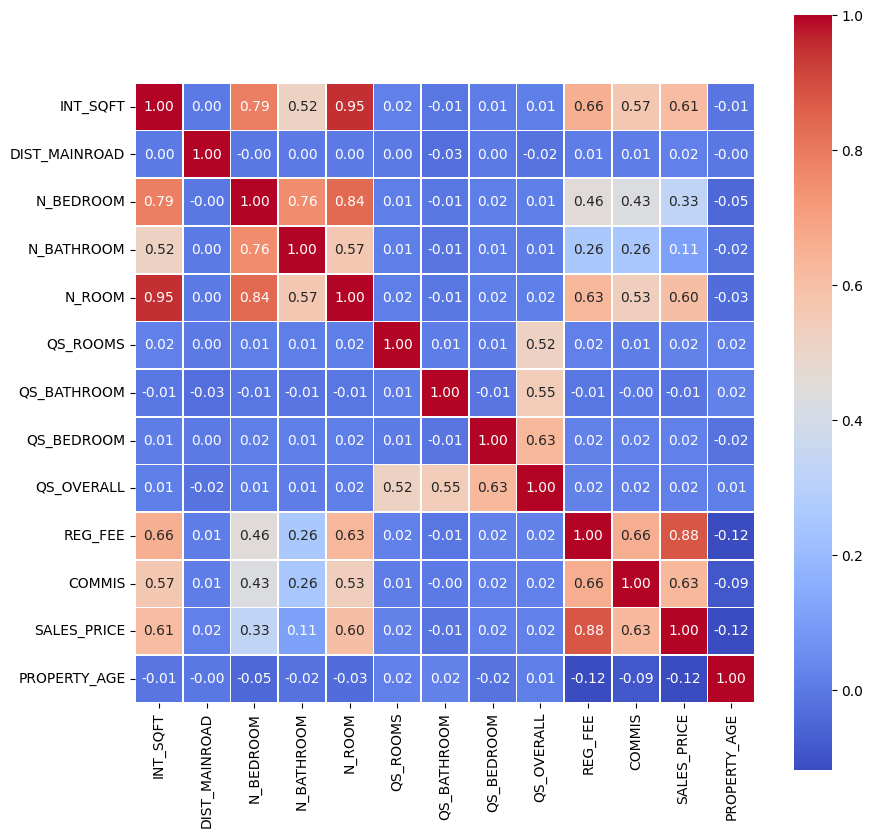

In [107]:
# plot heatmap for correlation
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(correlation, annot=True, square=True, fmt=".2f", linewidth=0.5, cmap="coolwarm")

Plotting of Numerical data vs Target

Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales

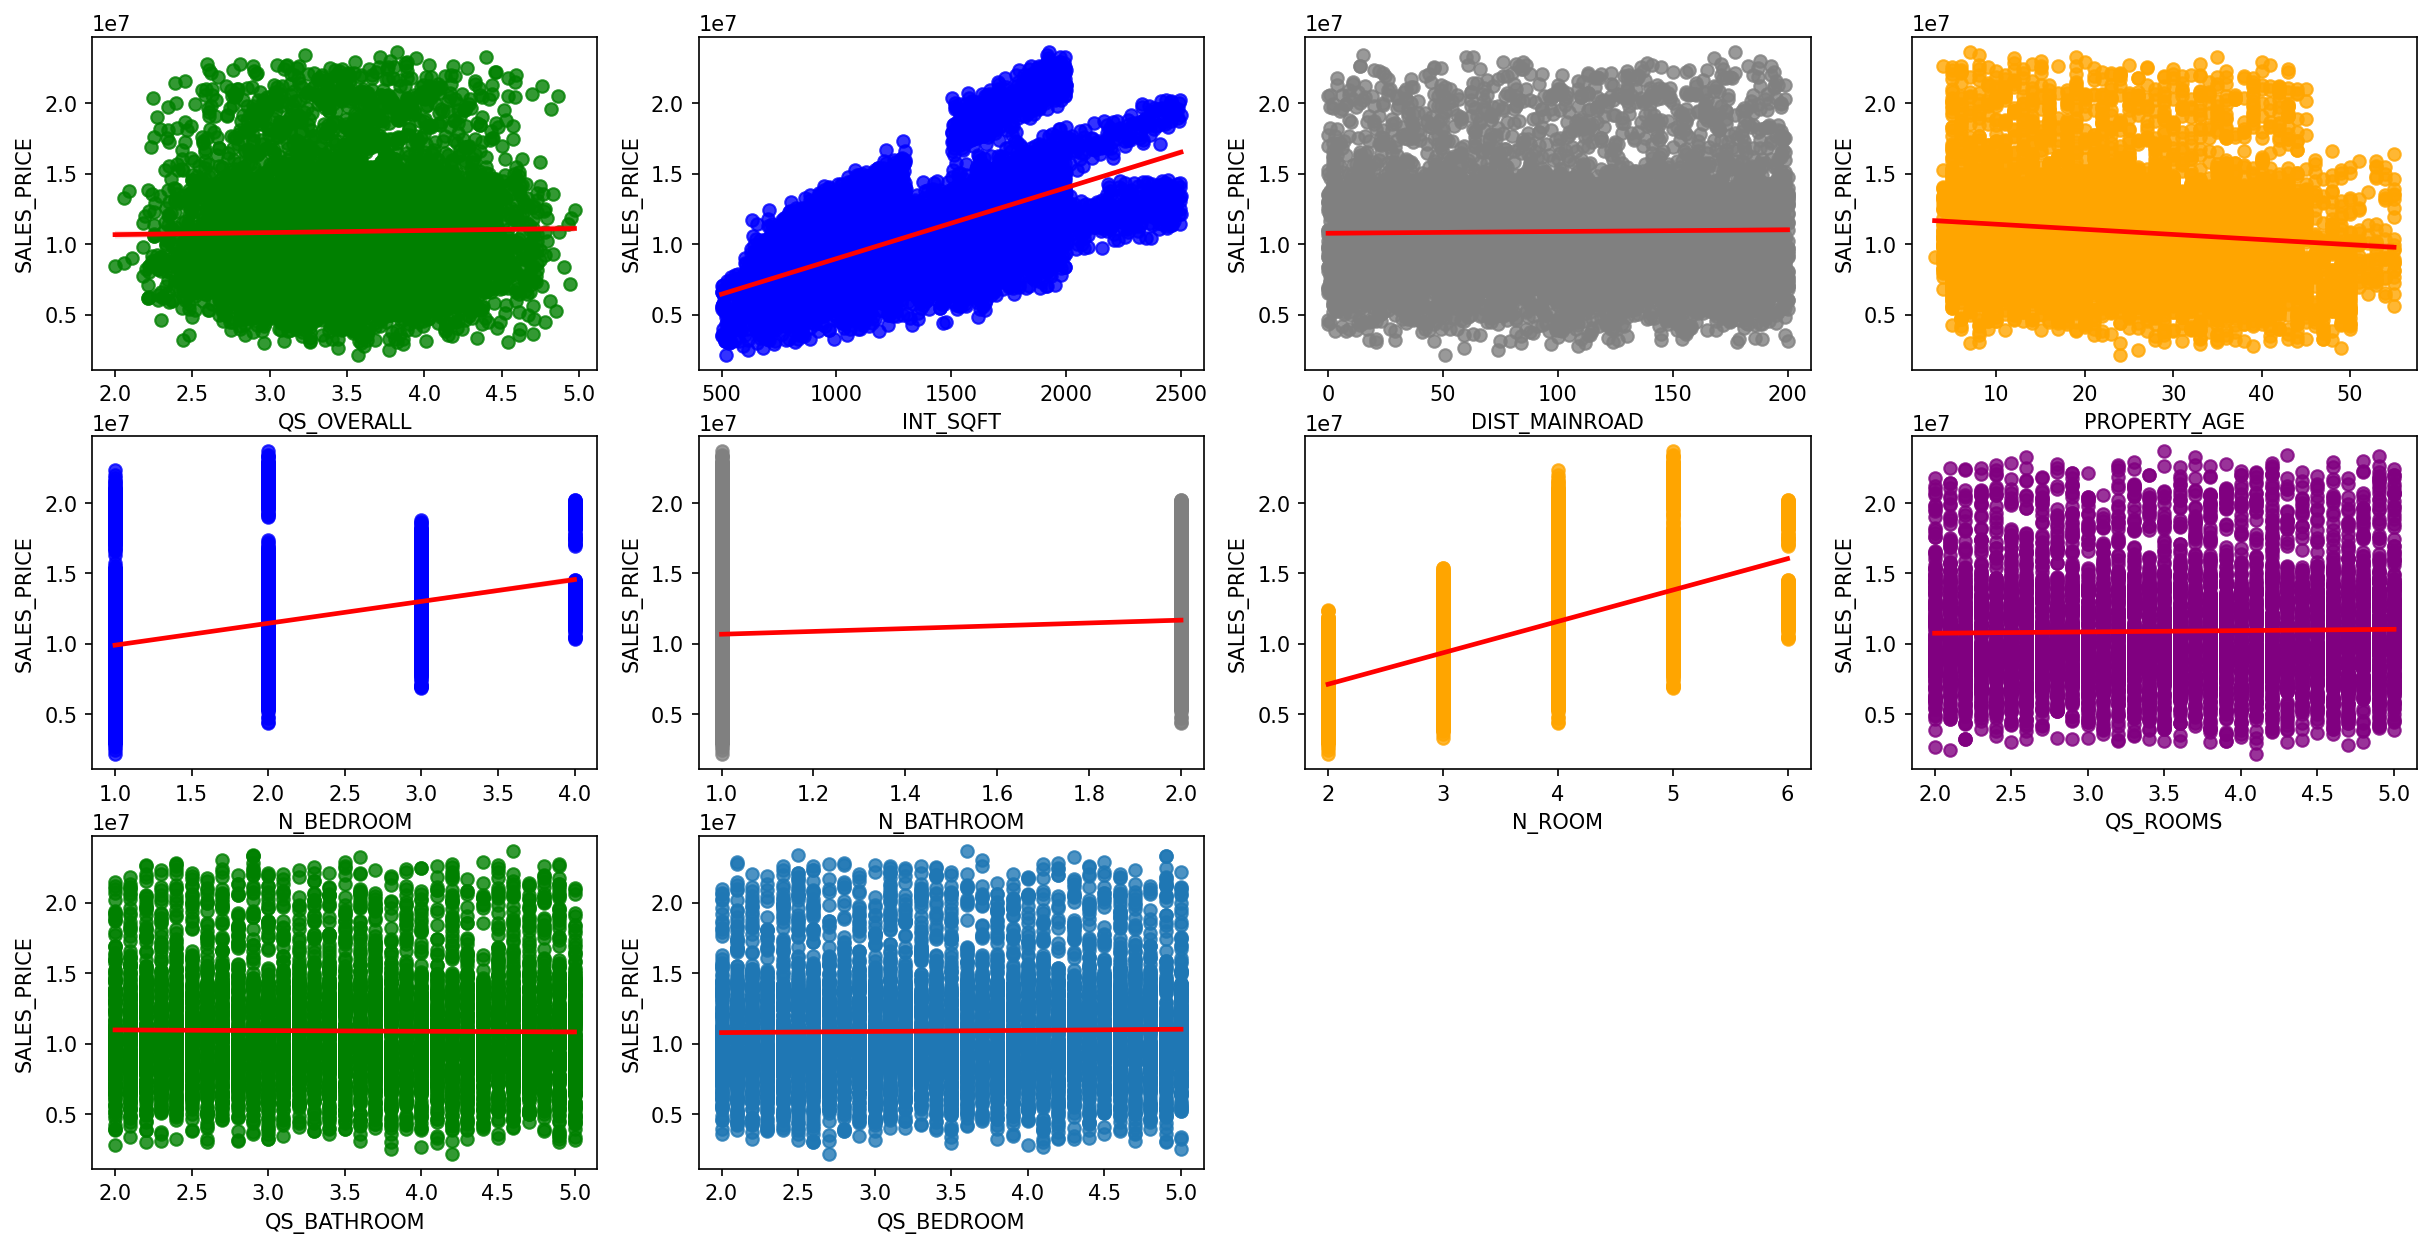

In [108]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(3,4,1)
sns.regplot(data.QS_OVERALL, data.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(3,4,2)
sns.regplot(data.INT_SQFT, data.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(3,4,3)
sns.regplot(data.DIST_MAINROAD, data.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(3,4,4)
sns.regplot(data.PROPERTY_AGE, data.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot(3,4,5)
sns.regplot(data.N_BEDROOM, data.SALES_PRICE, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(3,4,6)
sns.regplot(data.N_BATHROOM, data.SALES_PRICE, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(3,4,7)
sns.regplot(data.N_ROOM, data.SALES_PRICE, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot(3,4,8)
sns.regplot(data.QS_ROOMS, data.SALES_PRICE, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot(3,4,9)
sns.regplot(data.QS_BATHROOM, data.SALES_PRICE, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(3,4,10)
sns.regplot(data.QS_BEDROOM, data.SALES_PRICE, line_kws={"color": "red"})

plt.show()

Interpretation:-

Here we can come to conclusion that:

1) In n_bedroom we find good relation so this feature will be very important for us so we will keep it.

2) In n_bathroom we find small relation so this feature will be useful for us so we will keep it.

3) In n_room we find good relation so this feature will be very important for us so we will keep it.

4) In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

5) In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

6) In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

7) In qs_overall we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

8) In int_sqft we find good relation so this feature will be very important for us so we will keep it.

9) In dist_mainroad we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

10) In property_age we find small relation so this feature will be useful for us so we will keep it.

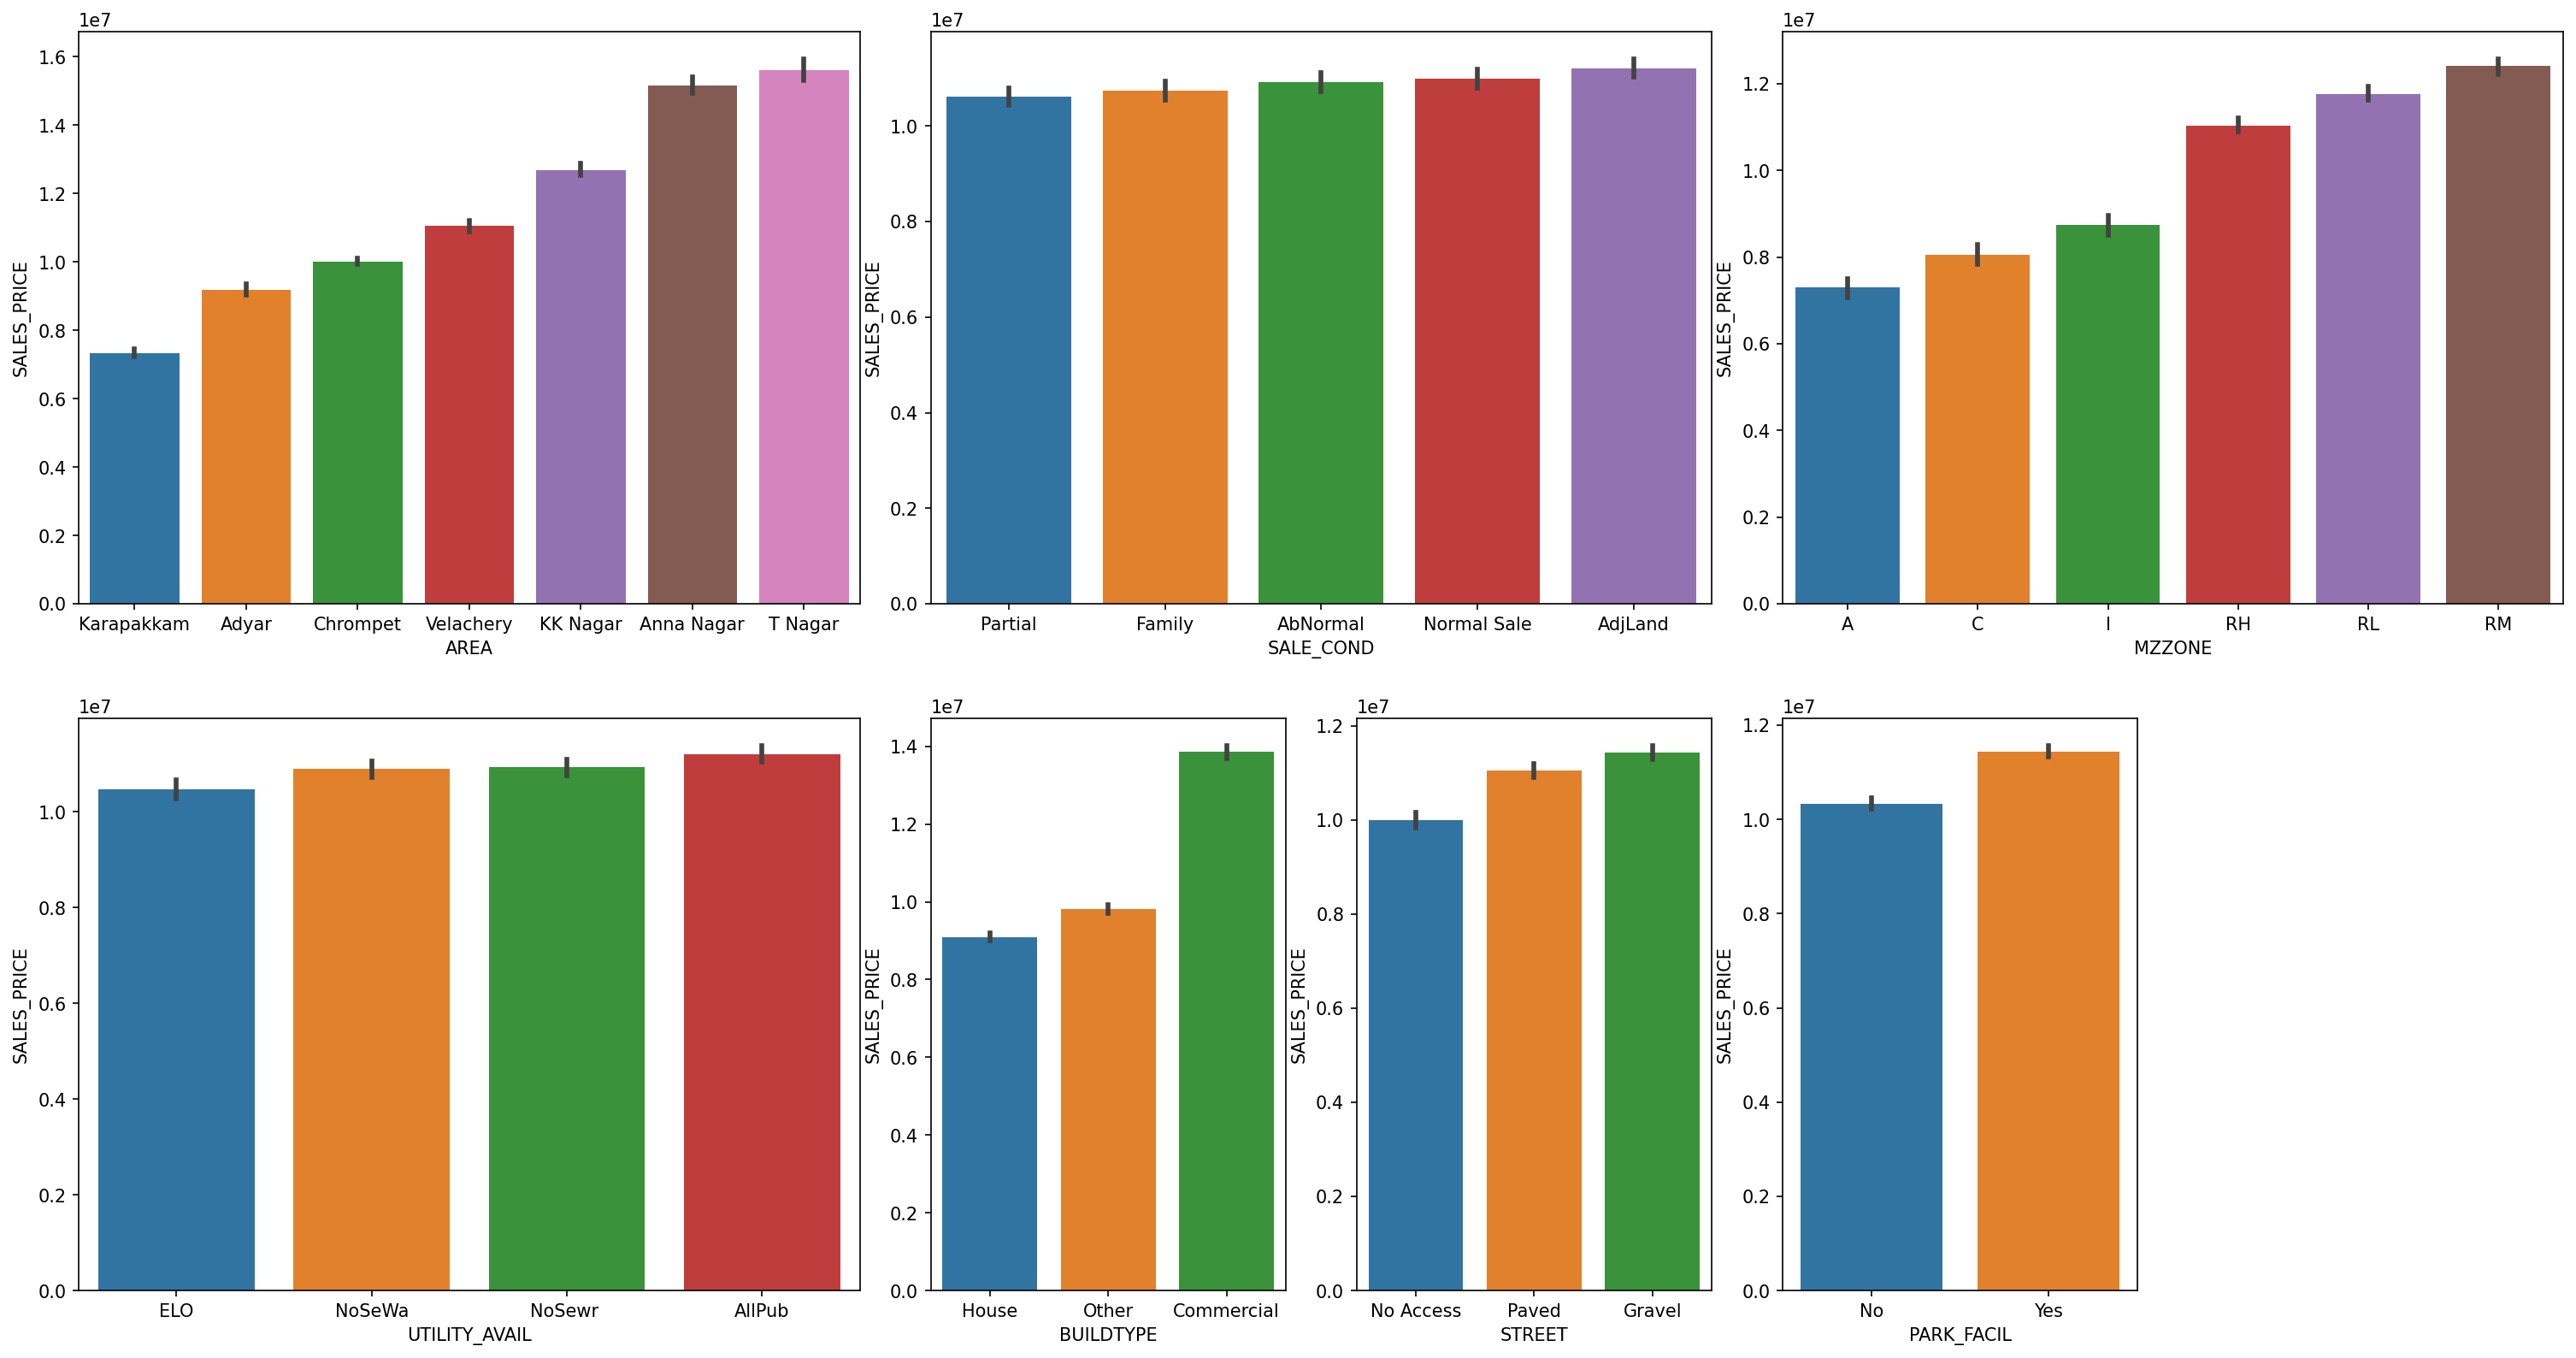

In [109]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
               

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

 **Square Foot of the House will Effect the Sales Price**

In [110]:

px.scatter(data,x='INT_SQFT',y='SALES_PRICE',color='AREA',size='INT_SQFT',labels={'INT_SQFT':'SQFT'},template='plotly_dark',
           title='SQFT Versus SALES PRICE of Houses in Different Areas')

1) Increase in Square Foot of Houses increases the Sales price of Houses

2) As we can see the Houses Related to Same Area Having Almost Similar Square feet Length

3) T Nagar and Anna Nagar Area Houses has Maximum Price Having Square Foot in the Range of 1500 to 2000

4) KK Nagar Area Houses Has high Square foots from 1400 to 2500

 **Count of houses in different Area of chennai**

In [111]:
px.pie(data.groupby("AREA", as_index=False)["PRT_ID"].count(), values="PRT_ID", names="AREA", labels={"PRT_ID":"COUNT"},
      color_discrete_sequence = px.colors.sequential.Plasma, template = "plotly_dark", hole=0.5, title = "Houses Count in different Areas of Chennai" )

1) Chrompet Area has Maximum Houses as compared with other(1699 houses)

2) T Nagar Area has Lesser Houses in chennai (501 Houses)

 **Sales Price of Houses varies with Different Areas in Chennai**

In [112]:
px.box(data, x="AREA", y = "SALES_PRICE", color = "AREA", template = "plotly_dark", title = "Sales Price of House in Different Areas")

1) T Nagar And Anna Nagar Area Houses has Maximum sales price and KK Nagar Area has second Max Sales Price 

2) Karapakkam Area has less Sales price as compared with other Houses

 **Sales Price Depends on the Main Road Distance From the House**

In [113]:
px.scatter(data,x='DIST_MAINROAD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='MAINROAD DISTANCE Vs SALES_PRICE')

1) It Seems Like MainRoad Distance Does Not Affecting the Sales Price of Houses

2) The Price is same for the Houses having shorter Main Road Distance and Larger Main Road Distance

3) So the Main Road Distance is Not influencing More on Sales Price

**Sales Price Depends On Number of Rooms**

In [114]:
px.box(data, x="N_ROOM", y = "SALES_PRICE", color = "AREA", template = "plotly_dark", title = "Total Room Versus Sales Price of House in Different Areas")

1) As we can see increase in Rooms Count increases the Sales Price of Houses

2) Houses having total Four and Five Rooms in the areas of Anna Nagar,Velacherry,KK Nagar and T Nagar Has Maximum Sales Price

3) Karapakam, Adyar and Chrompet Area Houses having Two to Four Rooms but four 
room houses has maximum sales price when compared to others

4) Anna Nagar,Velacherry and T Nagar Areas consists of Four to Five Room Houses

5) KK Nagar Area Houses consists of Two to six Rooms and the price incresases with increase in the Room Count

**Sales Prices Depends On Number Of Bathroom**

In [115]:
px.box(data, x="N_BATHROOM", y = "SALES_PRICE", color = "AREA", template = "plotly_dark", title = "Total Bathroom Versus Sales Price of House in Different Areas")

1) Increase in bathroom increases the sale price of houses

2) KK Nagar, T Nagar Area Having only one bathroom Has Maximum sales Price 
   when compared to other Areas 

**Sales Price Depends On Number Of Bedroom**

In [116]:
px.box(data, x="N_BEDROOM", y = "SALES_PRICE", color = "AREA", template = "plotly_dark", title = "Total Bedroom Versus Sales Price of House in Different Areas")

1) Increase in Bed Rooms Increases the Sales Price

2) Anna Nagar,T Nagar,Adyar,Karapakam and Chrompet Area Houses consists of one to two bedrooms but two bedroom houses has maximum sales price in these areas

3) KK Nagar Area Consists of Houses having one to four bedrooms and Sales price increases with increase in bedrooms

4) Velacherry Area Houses Consists of two to three Bedrooms

5)Out of all Anna Nagar and T Nagar Area Houses with two Bedrooms has Maximum Sales Price

 **Sales Price Depends On the Sale Condion of the Houses**

In [117]:
px.box(data,x='SALE_COND',y='SALES_PRICE',color='AREA',template='plotly_dark',title='Sale Condition Versus Sales Price of Houses in Different Areas')

Sales Price is Maximum for Normal, Family and AbNormal conditions of Sale

**Sales Price Depends On the Parking Facility of the Houses**

In [118]:
px.box(data,x='PARK_FACIL',y='SALES_PRICE',color='AREA',template='plotly_dark',title='Parking Facility Versus Sales Price of Houses in Different Areas')

Sales Price is Maximum for the Houses having Parking Facility in Different Areas

***Sales Price Depends On the Build Type of the Houses***

In [119]:
px.box(data,x='BUILDTYPE',y='SALES_PRICE',color='AREA',template='plotly_dark',title='Build Type Versus Sales Price of Houses in Different Areas')

Sales Price is Maximum for the Houses having Commercial Build Type in Different Areas

***Sales Price Depends On the Street Type of the Houses***

In [120]:
px.box(data,x='STREET',y='SALES_PRICE',color='AREA',template='plotly_dark',title='Street Versus Sales Price of Houses in Different Areas')

Sales Price is almost equal for all the Houses Having different Streets in different Areas

In [121]:
px.scatter(data,x='PROPERTY_AGE',y='SALES_PRICE',color='AREA',template='plotly_dark',title='PROPERTY_AGE Versus Sales Price of Houses in Different Areas')

***Encoding***

In [122]:
# We can use One HOt Encoding on buildtype column which contain ordinal data
# But to be simple we have just used get_dummies feature from pandas
data = pd.get_dummies(data,columns=['BUILDTYPE']) 

In [123]:
# WE CAN USED LABEL ENCODING TO CONVERT CATEGIRICAL DATA INTO NUMERIC DATA

lr = LabelEncoder()
for col in data.columns:
  if data[col].dtype == "object" :
    data[col] = lr.fit_transform(data[col])


In [124]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,PROPERTY_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,2266,4,1004,2011-05-04,131,1,1,3,0,1,...,3.9,4.9,4.330,380000,144400,7600000,44,1,0,0
1,6664,1,1986,2006-12-19,26,2,1,5,0,0,...,4.2,2.5,3.765,760122,304049,21717770,11,1,0,0
2,1270,0,909,2012-02-04,70,1,1,3,0,1,...,3.8,2.2,3.090,421094,92114,13159200,20,1,0,0
3,3755,6,1855,2010-03-13,14,3,2,5,2,0,...,3.9,3.6,4.010,356321,77042,9630290,22,0,0,1
4,4393,4,1226,2009-10-05,84,1,1,3,0,1,...,2.5,4.1,3.290,237000,74063,7406250,30,0,0,1


In [125]:
# SORTING THE DEPENDENT AND INDEPENDENT VARIABLE IN X AND Y

X = data.drop(["PRT_ID","SALES_PRICE","DATE_SALE","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL","DIST_MAINROAD",], axis=1)
Y = data["SALES_PRICE"]

In [126]:
X

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,PROPERTY_AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,4,1004,1,1,3,0,1,0,2,0,380000,144400,44,1,0,0
1,1,1986,2,1,5,0,0,0,0,3,760122,304049,11,1,0,0
2,0,909,1,1,3,0,1,1,0,4,421094,92114,20,1,0,0
3,6,1855,3,2,5,2,0,3,2,2,356321,77042,22,0,0,1
4,4,1226,1,1,3,0,1,0,0,1,237000,74063,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,1,1,2,1,0,1,1,5,208767,107060,49,0,0,1
7105,6,1897,3,2,5,2,1,2,1,3,346191,205551,9,0,0,1
7106,6,1614,2,1,4,3,0,2,0,2,317354,167028,28,0,1,0
7107,4,787,1,1,2,4,1,1,2,4,425350,119098,32,1,0,0


In [127]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30)

In [128]:
print("Training shape in X :", X_train.shape)
print("Training shape in y :", y_train.shape)
print("Testing shape in X :", X_test.shape)
print("Testing shape in y :", y_test.shape)

Training shape in X : (4976, 16)
Training shape in y : (4976,)
Testing shape in X : (2133, 16)
Testing shape in y : (2133,)


Feature Scaling

In [129]:
## SCALER THE VALUE TO CONVERT THE INT VALUE INTO MACHINE LANGUAGE
from sklearn.preprocessing import StandardScaler
Sscaler = StandardScaler()
X_train = pd.DataFrame(Sscaler.fit_transform(X_train), columns =X_train.columns)
X_test = pd.DataFrame(Sscaler.fit_transform(X_test), columns=X_test.columns)


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', r2_score(y_test,y_pred))


R2- SCORE: 0.9221108991935979


In [131]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root mean square error: ",rmse.round(3))


Root mean square error:  1050827.181


In [132]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = [GradientBoostingRegressor, RandomForestRegressor,
          DecisionTreeRegressor, LinearRegression,
          KNeighborsRegressor, SVR]


def model_cv_score(model_class):
    model = model_class()
    return cross_val_score(model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)

In [133]:
scores = []
for model in models:
    print(model)
    score = model_cv_score(model)
    scores.append(score.mean())
scores

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.linear_model._base.LinearRegression'>
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
<class 'sklearn.svm._classes.SVR'>


[0.9657431829253893,
 0.9709542078826543,
 0.9379842731407324,
 0.9207136311697571,
 0.9295361168622336,
 -0.02442336148448465]

In [134]:
# Select best model
index = scores.index(max(scores))
models[index]

sklearn.ensemble._forest.RandomForestRegressor

Now we know that the RandomForestRegressor is the best we will use grid search to tune the hyperparameter to get the best fit

In [146]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
    'max_depth':[None],
    'max_features': ["sqrt", "log2"],
    'n_estimators': [10,20,30,40,50,60,70,80,90,100]
}
model = RandomForestRegressor()
grid_RFR = GridSearchCV(estimator=model,
                        param_grid=parameters, cv=5, n_jobs=-1)
grid_RFR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [147]:
grid_RFR.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 90}

In [148]:
grid_RFR.best_score_

0.977671455456768

In [149]:
model = RandomForestRegressor(bootstrap=True, max_depth=None,
                              max_features="log2",
                              n_estimators=90)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.978486628908224

In [150]:
y_pred

array([ 7820494.27777778, 14369004.77777778,  9843762.77777778, ...,
       13859037.33333333,  8866626.16666667,  8906774.05555556])